In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from keras.applications import vgg16
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [4]:
data_path = '/content/drive/My Drive/dataset/CK+48/'
data_dir_list = os.listdir(data_path)

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-sadness

Loaded the images of dataset-happy

Loaded the images of dataset-anger

Loaded the images of dataset-surprise



(927, 224, 224, 3)

In [5]:
num_classes = 6

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:135]=0 #135
labels[135:312]=1 #177
labels[312:387]=2 #75
labels[387:594]=3 #207
labels[594:678]=4 #84
labels[678:927]=5 #249

# labels =to_categorical(labels, num_classes)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
input_shape=(224,224,3)
vgg = vgg16.VGG16(include_top=True, weights='imagenet')

out = Dense(6, activation='softmax', name='predictions')(vgg.layers[-2].output)
vgg_model = Model(vgg.input, out)

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['predictions','fc1','fc2']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

553467904/553467096 [==============================] - 6s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  app.launch_new_instance()


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f6ebeaee4a8>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f6ebeaee9e8>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f6ebeaeeb38>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f6ebeaeeeb8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f6ebeaeefd0>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f6ebda97ef0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f6ebdab3a90>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f6ebdab38d0>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f6ebdab85c0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f6ebdab8eb8>,block3_conv3,False


In [7]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [8]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(img_data, labels)

10

In [10]:
import matplotlib.pyplot as plt

def cnn_model(x_train,x_test,y_test,y_train):
    model = Sequential()
    model.add(vgg_model)
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 


    history=model.fit(x_train, y_train, epochs=35, batch_size=80,verbose=1)
    model.compile(loss = "categorical_crossentropy",optimizer = Adam(), metrics=['accuracy'],)

    loss,acc = model.evaluate(x_test, y_test)
    y_prediction = model.predict_classes(x_test)
    y_test_original=np.argmax(y_test,axis=1)
    confusion=confusion_matrix(y_true=y_test_original, y_pred=y_prediction)
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.title('model history')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model history')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    return acc,confusion

Epoch 1/35
834/834 [==============================] - 11s 13ms/step - loss: 16.0709 - accuracy: 0.1751
Epoch 2/35
834/834 [==============================] - 2s 3ms/step - loss: 1.8054 - accuracy: 0.2590
Epoch 3/35
834/834 [==============================] - 3s 3ms/step - loss: 1.3720 - accuracy: 0.4820
Epoch 4/35
834/834 [==============================] - 2s 3ms/step - loss: 1.1253 - accuracy: 0.5468
Epoch 5/35
834/834 [==============================] - 2s 3ms/step - loss: 0.9149 - accuracy: 0.6187
Epoch 6/35
834/834 [==============================] - 2s 3ms/step - loss: 0.7806 - accuracy: 0.7146
Epoch 7/35
834/834 [==============================] - 2s 3ms/step - loss: 0.6255 - accuracy: 0.7602
Epoch 8/35
834/834 [==============================] - 2s 3ms/step - loss: 0.5030 - accuracy: 0.8189
Epoch 9/35
834/834 [==============================] - 2s 3ms/step - loss: 0.5153 - accuracy: 0.7950
Epoch 10/35
834/834 [==============================] - 2s 3ms/step - loss: 0.4162 - accuracy: 0.8

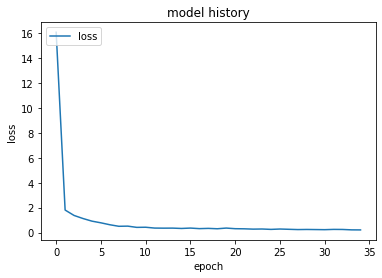

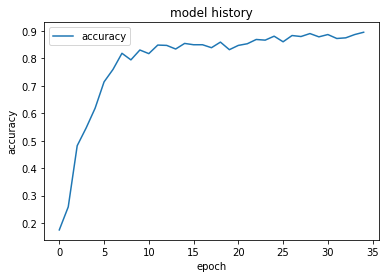

0.6774193644523621
[[13  1  0  0  0  0]
 [17  1  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  5 16  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/35
834/834 [==============================] - 3s 3ms/step - loss: 0.5033 - accuracy: 0.8118
Epoch 2/35
834/834 [==============================] - 2s 3ms/step - loss: 0.3181 - accuracy: 0.8573
Epoch 3/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2716 - accuracy: 0.8849
Epoch 4/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2615 - accuracy: 0.8777
Epoch 5/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2806 - accuracy: 0.8693
Epoch 6/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2407 - accuracy: 0.8849
Epoch 7/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2531 - accuracy: 0.8813
Epoch 8/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2270 - accuracy: 0.9017
Epoch 9/35
834/834 [=====

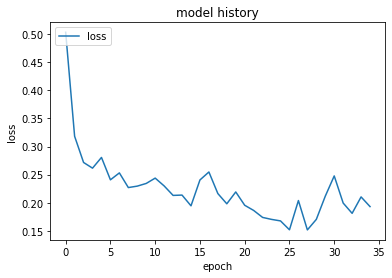

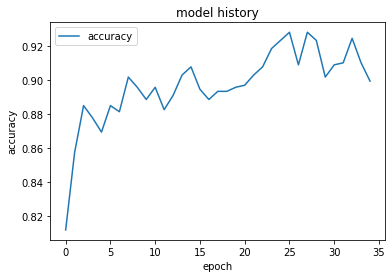

0.7204301357269287
[[11  3  0  0  0  0]
 [10  8  0  0  0  0]
 [ 0  4  3  0  0  0]
 [ 0  0  4 17  0  0]
 [ 0  0  0  5  3  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/35
834/834 [==============================] - 3s 3ms/step - loss: 0.3429 - accuracy: 0.8525
Epoch 2/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2526 - accuracy: 0.8861
Epoch 3/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2108 - accuracy: 0.9089
Epoch 4/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2118 - accuracy: 0.9041
Epoch 5/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1965 - accuracy: 0.9161
Epoch 6/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2314 - accuracy: 0.8861
Epoch 7/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2263 - accuracy: 0.8933
Epoch 8/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2125 - accuracy: 0.8957
Epoch 9/35
834/834 [=====

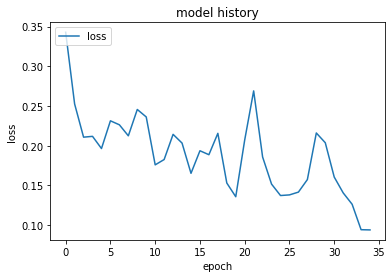

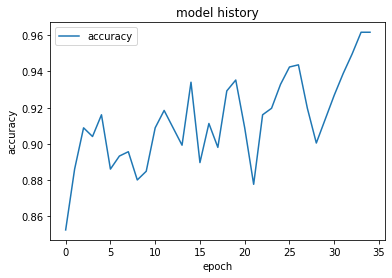

0.774193525314331
[[13  1  0  0  0  0]
 [ 4 13  0  0  0  0]
 [ 0  5  3  0  0  0]
 [ 0  0  9 12  0  0]
 [ 0  0  0  2  6  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/35
834/834 [==============================] - 3s 3ms/step - loss: 0.2675 - accuracy: 0.8957
Epoch 2/35
834/834 [==============================] - 2s 3ms/step - loss: 0.2633 - accuracy: 0.8933
Epoch 3/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1919 - accuracy: 0.9101
Epoch 4/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1441 - accuracy: 0.9424
Epoch 5/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1287 - accuracy: 0.9329
Epoch 6/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1182 - accuracy: 0.9460
Epoch 7/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1073 - accuracy: 0.9544
Epoch 8/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1509 - accuracy: 0.9353
Epoch 9/35
834/834 [======

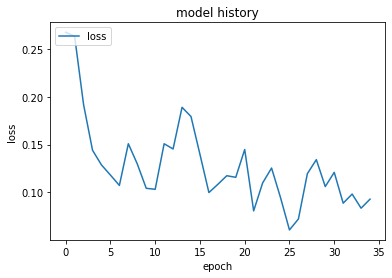

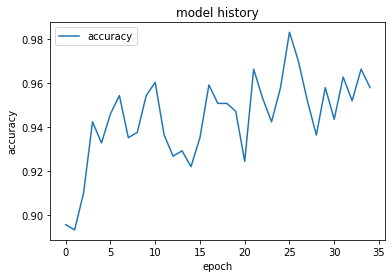

0.8924731016159058
[[ 8  6  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  6  2  0  0]
 [ 0  0  2 19  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/35
834/834 [==============================] - 3s 3ms/step - loss: 0.2208 - accuracy: 0.9089
Epoch 2/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1757 - accuracy: 0.9233
Epoch 3/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1340 - accuracy: 0.9376
Epoch 4/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1398 - accuracy: 0.9341
Epoch 5/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1277 - accuracy: 0.9424
Epoch 6/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1132 - accuracy: 0.9484
Epoch 7/35
834/834 [==============================] - 2s 3ms/step - loss: 0.0982 - accuracy: 0.9592
Epoch 8/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1059 - accuracy: 0.9472
Epoch 9/35
834/834 [=====

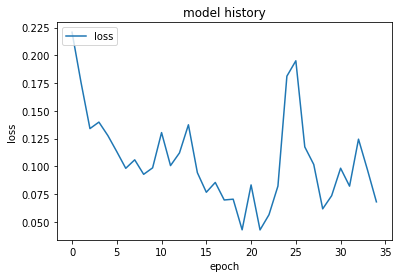

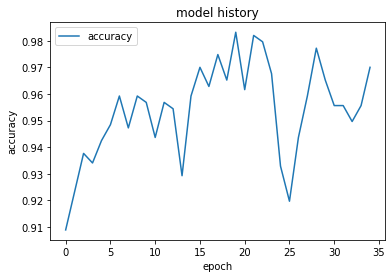

0.8709677457809448
[[12  2  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  7  1  0  0]
 [ 0  0  8 12  0  0]
 [ 0  0  0  1  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/35
834/834 [==============================] - 3s 3ms/step - loss: 0.2240 - accuracy: 0.9197
Epoch 2/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1428 - accuracy: 0.9341
Epoch 3/35
834/834 [==============================] - 2s 3ms/step - loss: 0.0856 - accuracy: 0.9676
Epoch 4/35
834/834 [==============================] - 2s 3ms/step - loss: 0.0645 - accuracy: 0.9664
Epoch 5/35
834/834 [==============================] - 2s 3ms/step - loss: 0.0911 - accuracy: 0.9640
Epoch 6/35
834/834 [==============================] - 2s 3ms/step - loss: 0.0525 - accuracy: 0.9784
Epoch 7/35
834/834 [==============================] - 2s 3ms/step - loss: 0.0520 - accuracy: 0.9712
Epoch 8/35
834/834 [==============================] - 2s 3ms/step - loss: 0.0670 - accuracy: 0.9736
Epoch 9/35
834/834 [=====

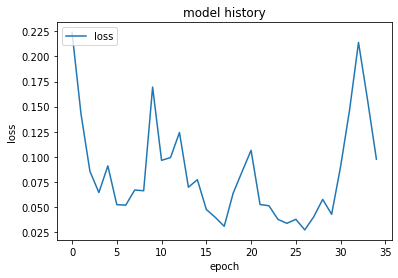

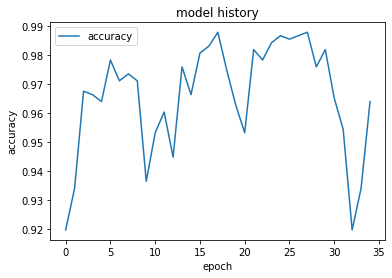

0.9139785170555115
[[11  2  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  4  4  0  0]
 [ 0  0  2 18  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/35
834/834 [==============================] - 3s 3ms/step - loss: 0.2794 - accuracy: 0.8993
Epoch 2/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1540 - accuracy: 0.9424
Epoch 3/35
834/834 [==============================] - 2s 3ms/step - loss: 0.1137 - accuracy: 0.9556
Epoch 4/35
834/834 [==============================] - 2s 3ms/step - loss: 0.0773 - accuracy: 0.9724
Epoch 5/35
834/834 [==============================] - 2s 3ms/step - loss: 0.0604 - accuracy: 0.9724
Epoch 6/35
834/834 [==============================] - 2s 3ms/step - loss: 0.0572 - accuracy: 0.9760
Epoch 7/35
834/834 [==============================] - 2s 3ms/step - loss: 0.0460 - accuracy: 0.9796
Epoch 8/35
834/834 [==============================] - 3s 3ms/step - loss: 0.0744 - accuracy: 0.9688
Epoch 9/35
834/834 [=====

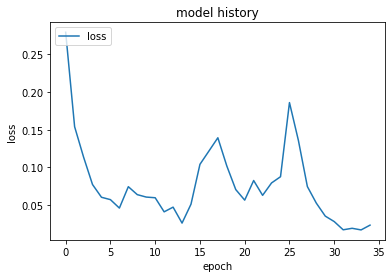

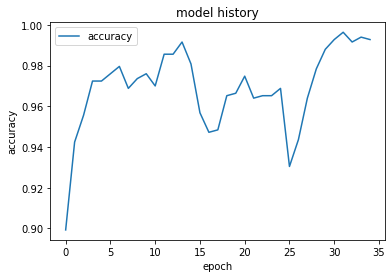

0.9784946441650391
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  2 18  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/35
835/835 [==============================] - 3s 4ms/step - loss: 0.2238 - accuracy: 0.9401
Epoch 2/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0767 - accuracy: 0.9725
Epoch 3/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0446 - accuracy: 0.9868
Epoch 4/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0345 - accuracy: 0.9832
Epoch 5/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0426 - accuracy: 0.9856
Epoch 6/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0163 - accuracy: 0.9976
Epoch 7/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0142 - accuracy: 0.9952
Epoch 8/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0173 - accuracy: 0.9928
Epoch 9/35
835/835 [=====

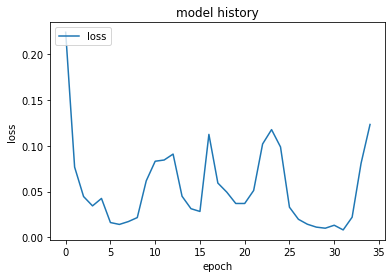

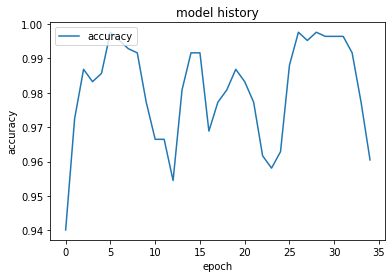

0.8260869383811951
[[12  0  0  1  0  0]
 [ 0 12  6  0  0  0]
 [ 0  0  1  6  0  0]
 [ 0  0  0 19  2  0]
 [ 0  0  0  1  8  0]
 [ 0  0  0  0  0 24]]
----------------------------
Epoch 1/35
835/835 [==============================] - 3s 3ms/step - loss: 0.3568 - accuracy: 0.9210
Epoch 2/35
835/835 [==============================] - 2s 3ms/step - loss: 0.2134 - accuracy: 0.9150
Epoch 3/35
835/835 [==============================] - 2s 3ms/step - loss: 0.1130 - accuracy: 0.9473
Epoch 4/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0633 - accuracy: 0.9772
Epoch 5/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0371 - accuracy: 0.9892
Epoch 6/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0278 - accuracy: 0.9940
Epoch 7/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0470 - accuracy: 0.9844
Epoch 8/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0387 - accuracy: 0.9844
Epoch 9/35
835/835 [=====

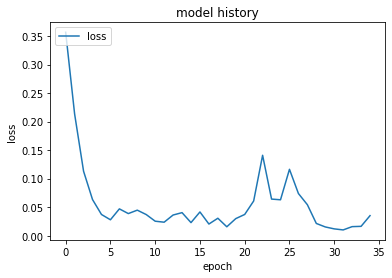

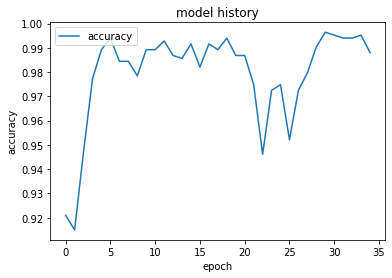

0.945652186870575
[[13  0  0  0  0  0]
 [ 0 15  3  0  0  0]
 [ 0  0  6  1  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  1  7  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/35
835/835 [==============================] - 3s 3ms/step - loss: 0.1914 - accuracy: 0.9449
Epoch 2/35
835/835 [==============================] - 2s 3ms/step - loss: 0.1320 - accuracy: 0.9569
Epoch 3/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0621 - accuracy: 0.9725
Epoch 4/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0498 - accuracy: 0.9856
Epoch 5/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0286 - accuracy: 0.9916
Epoch 6/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 7/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0548 - accuracy: 0.9749
Epoch 8/35
835/835 [==============================] - 2s 3ms/step - loss: 0.0342 - accuracy: 0.9856
Epoch 9/35
835/835 [======

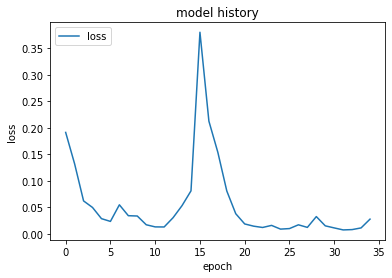

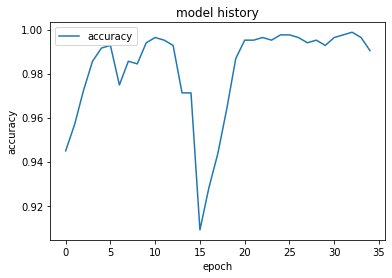

0.9347826242446899
[[13  0  0  0  0  0]
 [ 0 16  2  0  0  0]
 [ 0  0  5  2  0  0]
 [ 0  0  0 19  2  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
----------------------------


In [11]:
prediction=[]
confusion_list=[]
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
num_classes = 6
for train_index, test_index in skf.split(img_data, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = img_data[train_index], img_data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    x_train=x_train.reshape(x_train.shape[0],IMAGE_WIDTH,IMAGE_HEIGHT,3)
    x_test=x_test.reshape(x_test.shape[0],IMAGE_WIDTH,IMAGE_HEIGHT,3)
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    X,Y=cnn_model(x_train,x_test,y_test,y_train)
    prediction.append(X)
    confusion_list.append(Y)
    print(X)
    print(Y)
    print("----------------------------")

In [12]:
print(prediction)

[0.6774193644523621, 0.7204301357269287, 0.774193525314331, 0.8924731016159058, 0.8709677457809448, 0.9139785170555115, 0.9784946441650391, 0.8260869383811951, 0.945652186870575, 0.9347826242446899]


In [13]:
for x in range(len(confusion_list)): 
    print (confusion_list[x],sep = "\n")
    print("----------------------------")    

[[13  1  0  0  0  0]
 [17  1  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  5 16  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[11  3  0  0  0  0]
 [10  8  0  0  0  0]
 [ 0  4  3  0  0  0]
 [ 0  0  4 17  0  0]
 [ 0  0  0  5  3  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[13  1  0  0  0  0]
 [ 4 13  0  0  0  0]
 [ 0  5  3  0  0  0]
 [ 0  0  9 12  0  0]
 [ 0  0  0  2  6  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[ 8  6  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  6  2  0  0]
 [ 0  0  2 19  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[12  2  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  7  1  0  0]
 [ 0  0  8 12  0  0]
 [ 0  0  0  1  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[11  2  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  4  4  0  0]
 [ 0  0  2 18  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 